<a href="https://colab.research.google.com/github/SaiKoushik1825/Machine-Learning/blob/main/MLlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK 2

In [1]:
#Q1
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#load data
iris=datasets.load_iris()
X=iris.data
y=iris.target
df1=pd.DataFrame(X,columns=iris.feature_names)
df1['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df1.insert(0, 'Id', range(1, len(df1) + 1))
print(X.shape)
print(X[:3])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [ ]:
#Q2
print(iris.keys())
print(iris.feature_names)
print(iris.DESCR) #or iris['DESCR']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width: 

In [ ]:
#Q3
print(df1.isnull().sum())
len(df1)

Id                   0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


150

In [ ]:
#4)
print(df1.describe())

               Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
count  150.000000         150.000000        150.000000         150.000000   
mean    75.500000           5.843333          3.057333           3.758000   
std     43.445368           0.828066          0.435866           1.765298   
min      1.000000           4.300000          2.000000           1.000000   
25%     38.250000           5.100000          2.800000           1.600000   
50%     75.500000           5.800000          3.000000           4.350000   
75%    112.750000           6.400000          3.300000           5.100000   
max    150.000000           7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
#5)
for species in df1['Species'].unique():
    print(f"\nObservations for {species}:")
    print(df1[df1['Species'] == species].head(3))


Observations for setosa:
   Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0   1                5.1               3.5                1.4   
1   2                4.9               3.0                1.4   
2   3                4.7               3.2                1.3   

   petal width (cm) Species  
0               0.2  setosa  
1               0.2  setosa  
2               0.2  setosa  

Observations for versicolor:
    Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
50  51                7.0               3.2                4.7   
51  52                6.4               3.2                4.5   
52  53                6.9               3.1                4.9   

    petal width (cm)     Species  
50               1.4  versicolor  
51               1.5  versicolor  
52               1.5  versicolor  

Observations for virginica:
      Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
100  101                6.3               3.3                

In [ ]:
#6)
df_no_id = df1.drop(columns='Id')
print(df_no_id.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
#7)
print(df1.iloc[0:1, 0:4])

   Id  sepal length (cm)  sepal width (cm)  petal length (cm)
0   1                5.1               3.5                1.4


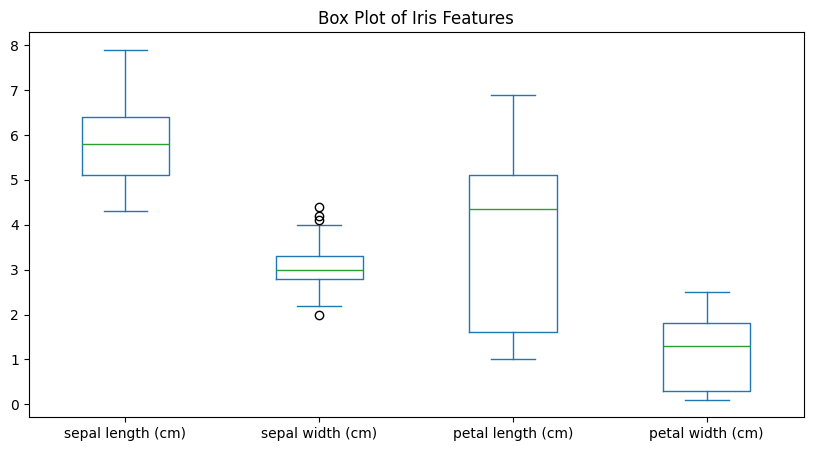

In [ ]:
#8)
df_no_id.drop(columns='Species').plot(kind='box', figsize=(10,5))
plt.title("Box Plot of Iris Features")
plt.show()

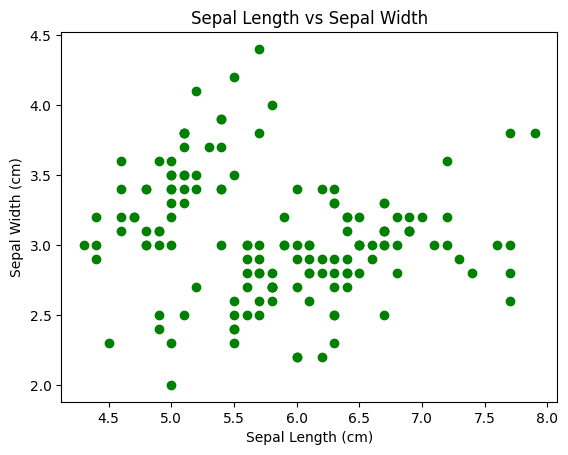

In [ ]:
#11)
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], c='green')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

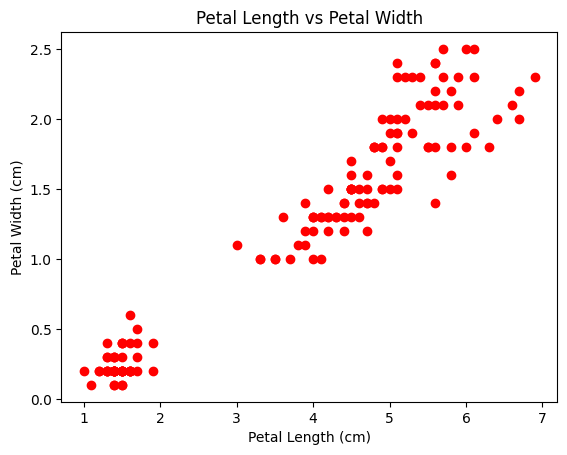

In [ ]:
#12)
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], c='red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.show()


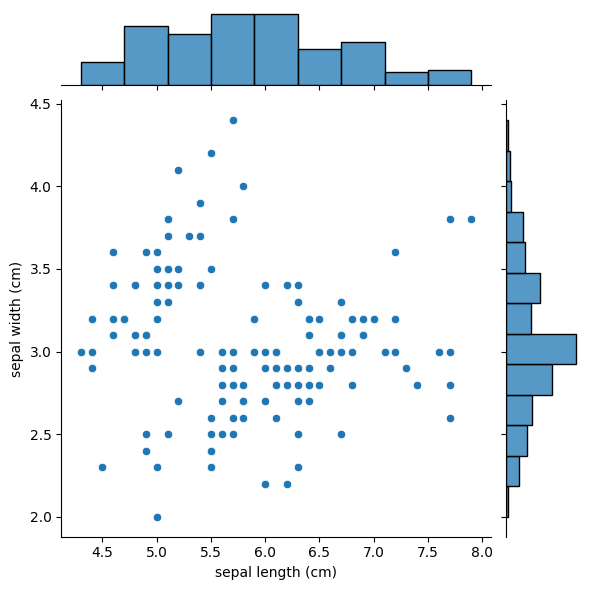

In [ ]:
#14)
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=df1, kind='scatter')
plt.show()

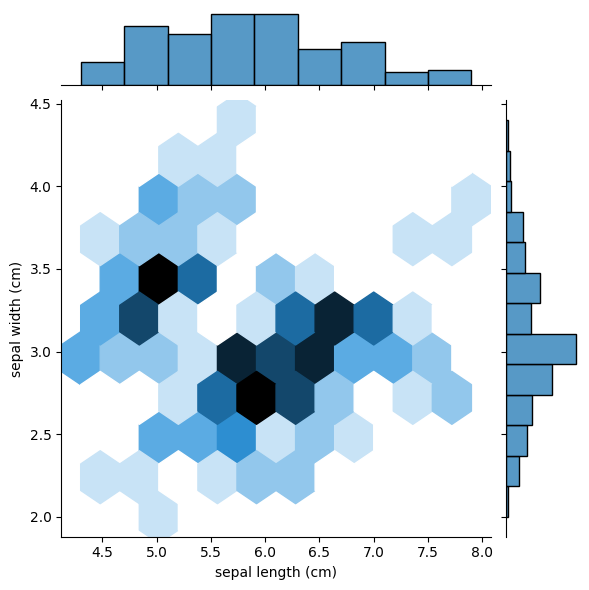

In [ ]:
#15)
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=df1, kind='hex')
plt.show()


In [ ]:
#20)
X = df1.iloc[:, 0:4]
y = df1['Species']
print("Attributes (X):\n", X.head())
print("\nLabels (y):\n", y.head())

Attributes (X):
    Id  sepal length (cm)  sepal width (cm)  petal length (cm)
0   1                5.1               3.5                1.4
1   2                4.9               3.0                1.4
2   3                4.7               3.2                1.3
3   4                4.6               3.1                1.5
4   5                5.0               3.6                1.4

Labels (y):
 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [ ]:
#21)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\n=== Training Data (first 5) ===\n", X_train.head())
print("\n=== Test Data (first 5) ===\n", X_test.head())


X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)

=== Training Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
81    82                5.5               2.4                3.7
133  134                6.3               2.8                5.1
137  138                6.4               3.1                5.5
75    76                6.6               3.0                4.4
109  110                7.2               3.6                6.1

=== Test Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
73    74                6.1               2.8                4.7
18    19                5.7               3.8                1.7
118  119                7.7               2.6                6.9
78    79                6.0               2.9                4.5
76    77                6.8               2.8                4.8


In [ ]:
#22)
df1['Species_Code'] = df1['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
print(df1[['Species', 'Species_Code']].head())
X = df1.iloc[:, 0:4]
y = df1['Species_Code']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("\n=== Training Data (first 5) ===\n", X_train.head())
print("\n=== Test Data (first 5) ===\n", X_test.head())

  Species Species_Code
0  setosa            0
1  setosa            0
2  setosa            0
3  setosa            0
4  setosa            0
Train shape: (120, 4) (120,)
Test shape: (30, 4) (30,)

=== Training Data (first 5) ===
     Id  sepal length (cm)  sepal width (cm)  petal length (cm)
22  23                4.6               3.6                1.0
15  16                5.7               4.4                1.5
65  66                6.7               3.1                4.4
11  12                4.8               3.4                1.6
42  43                4.4               3.2                1.3

=== Test Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
73    74                6.1               2.8                4.7
18    19                5.7               3.8                1.7
118  119                7.7               2.6                6.9
78    79                6.0               2.9                4.5
76    77                6.8             

WEEK 3

In [ ]:
df=pd.read_csv("diabetes.csv")

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns="Outcome"),df["Outcome"],test_size=0.4,random_state=42)
constant_features=[features for features in X_train.columns if X_train[features].std()==0]
len(constant_features)

0

In [ ]:
#Quasi constant
quasi_constant_feat=[]
for feature in X_train.columns:
  predominant=(X_train[feature].value_counts()/float(len(X_train))).sort_values(ascending=False).values[0]
  if predominant>=0.998:
    quasi_constant_feat.append(feature)
len(quasi_constant_feat)

0

<Axes: >

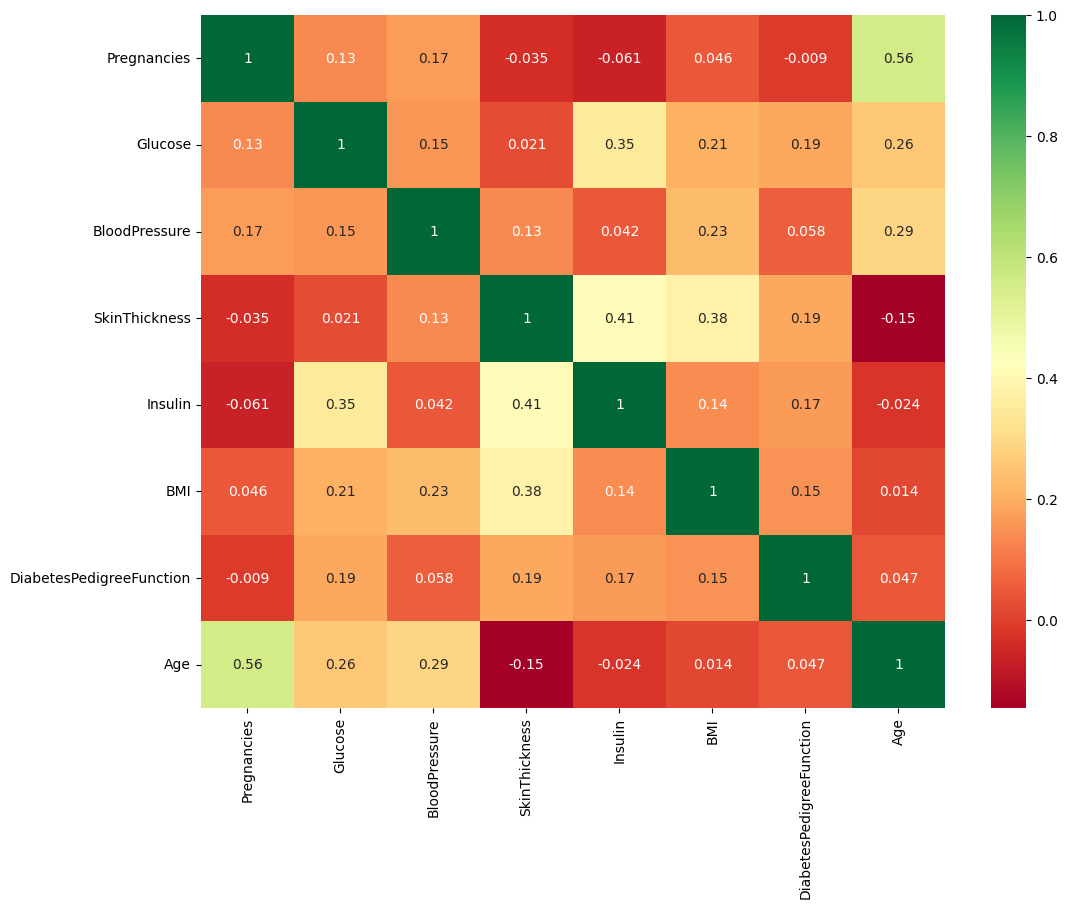

In [ ]:
corrmat=X_train.corr()
fig, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")



set() 
correlated_features: 0
(537, 8) (231, 8)




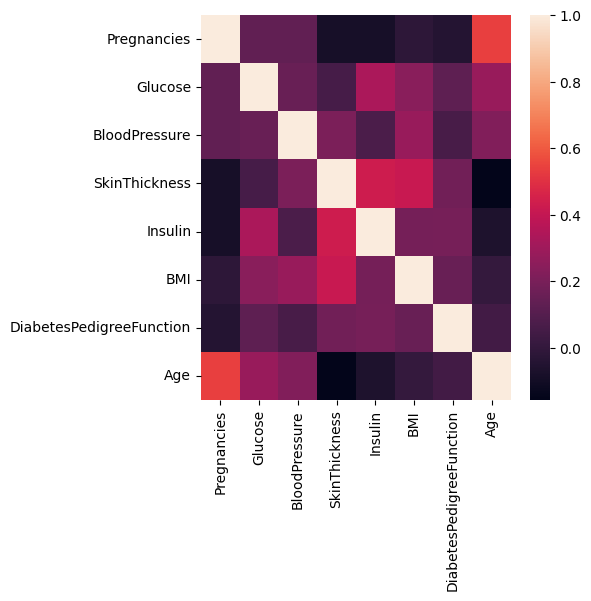

In [ ]:
#correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv("diabetes.csv")
df.shape
df.head()
[col for col in df.columns if df[col].isnull().sum()>0]

X_train,X_test,y_train,y_test=train_test_split(
    df.drop(labels=['Outcome'],axis=1),
    df['Outcome'],
    test_size=0.3,
    random_state=0
)

# Select only numeric columns for correlation calculation
X_train_numeric = X_train.select_dtypes(include=np.number)

corrmat = X_train_numeric.corr()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.heatmap(corrmat)

print('\n')

group_feature_ls = []
correlation_group = []

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# Calculate correlated features on the numeric subset
corr_features = correlation(X_train_numeric, 0.9)
correlated_features = set(corr_features)
print(correlated_features, "\ncorrelated_features:", len(correlated_features))

# Drop correlated features from the original X_train and X_test
X_train.drop(labels = correlated_features, axis = 1, inplace=True)
X_test.drop(labels = correlated_features, axis = 1, inplace=True)
print(X_train.shape, X_test.shape)

print('\n')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Non-numeric columns: Index([], dtype='object')


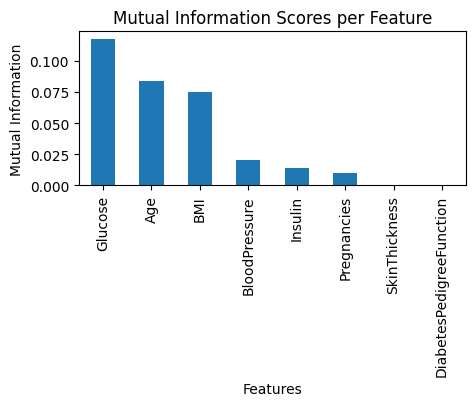

Top 20 features based on Mutual Information:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object') 
Mutual Information: 20
(537, 8) (231, 8)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=8. All the features will be returned.
  warnings.warn(


In [ ]:
#mutal information
from sklearn.feature_selection import mutual_info_classif, SelectKBest, mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv("diabetes.csv")
df.shape
df.head()
[col for col in df.columns if df[col].isnull().sum()>0]

X_train,X_test,y_train,y_test=train_test_split(
    df.drop(labels=['Outcome'],axis=1),
    df['Outcome'],
    test_size=0.3,
    random_state=0
)


X_train_filled = X_train.fillna(0)

# Identify non-numeric columns
non_numeric_cols = X_train_filled.select_dtypes(exclude=np.number).columns
print("Non-numeric columns:", non_numeric_cols)

# Handle non-numeric columns (example: dropping them for simplicity)
X_train_filled_numeric = X_train_filled.drop(columns=non_numeric_cols)


mi = mutual_info_regression(X_train_filled_numeric, y_train)

mi_series = pd.Series(mi)
mi_series.index = X_train_filled_numeric.columns

mi_sorted = mi_series.sort_values(ascending=False)

plt.figure(figsize=(5, 2)) # Reduced figure size
mi_sorted.plot.bar()
plt.title("Mutual Information Scores per Feature")
plt.ylabel("Mutual Information")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_regression, k=20)
selector.fit(X_train_filled_numeric, y_train)

top_mi_features = X_train_filled_numeric.columns[selector.get_support()]
print("Top 20 features based on Mutual Information:\n", top_mi_features, "\nMutual Information: 20")

X_train = X_train[top_mi_features]
X_test = X_test[top_mi_features]
print(X_train.shape, X_test.shape)

WEEK 4

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
titanic_df=pd.read_csv("/content/drive/MyDrive/ML/Copy of titanic_train.csv")
titanic_df_test=pd.read_csv("/content/drive/MyDrive/ML/Copy of titanic_test.csv")

In [5]:
titanic_df.columns
constant_features=[features for features in titanic_df.columns if titanic_df[features].nunique == 1]
len(constant_features)

0

In [6]:
#Quasi-constant
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
threshold = 0.99
quasi_constant=[]
for feature in titanic_df.columns:
  predominant=(titanic_df[feature].value_counts()/float(len(titanic_df))).sort_values(ascending=False).values[0]
  if predominant>=0.998:
    quasi_constant.append(feature)
print("quasi_constant_feature:",len(quasi_constant))

quasi_constant_feature: 0


Non-numeric columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
mutal_information Survived       0.664624
Fare           0.136589
Pclass         0.055682
Age            0.032191
PassengerId    0.013373
Parch          0.007006
SibSp          0.000000
dtype: float64


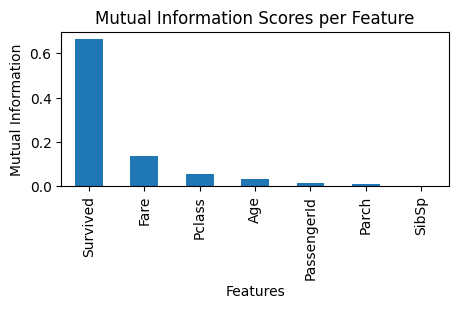

In [8]:
#mutal information
from sklearn.feature_selection import mutual_info_classif, SelectKBest, mutual_info_regression
X_train_filled = titanic_df.fillna(0)

non_numeric_cols = X_train_filled.select_dtypes(exclude=np.number).columns
print("Non-numeric columns:", non_numeric_cols)

X_train_filled_numeric = X_train_filled.drop(columns=non_numeric_cols)


mi = mutual_info_regression(X_train_filled_numeric, titanic_df["Survived"])

mi_series = pd.Series(mi)
mi_series.index = X_train_filled_numeric.columns

mi_sorted = mi_series.sort_values(ascending=False)
print("mutal_information",mi_sorted)
plt.figure(figsize=(5, 2))
mi_sorted.plot.bar()
plt.title("Mutual Information Scores per Feature")
plt.ylabel("Mutual Information")
plt.xlabel("Features")
plt.show()


In [9]:
#chi-2
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic = {chi2}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p}")
print("Expected frequencies:\n", expected)
alpha = 0.05
if p < alpha:
    print("\nConclusion: Reject the null hypothesis — 'Sex' and 'Survived' are dependent.")
else:
    print("\nConclusion: Fail to reject the null hypothesis — 'Sex' and 'Survived' are independent.")

Survived    0    1
Sex               
female     81  233
male      468  109
Chi-square statistic = 260.71702016732104
Degrees of freedom = 1
P-value = 1.1973570627755645e-58
Expected frequencies:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]

Conclusion: Reject the null hypothesis — 'Sex' and 'Survived' are dependent.


In [10]:
#anova
import pandas as pd
from scipy.stats import f_oneway

df = pd.read_csv("/content/drive/MyDrive/ML/Copy of titanic_train.csv")

# Drop rows with missing Age values
df = df.dropna(subset=['Age'])

# Group ages by Pclass
group1 = df[df['Pclass'] == 1]['Age']
group2 = df[df['Pclass'] == 2]['Age']
group3 = df[df['Pclass'] == 3]['Age']


f_stat, p_val = f_oneway(group1, group2, group3)

print("F-statistic:", f_stat)
print("P-value:", p_val)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("\nConclusion: Reject the null hypothesis — at least one group mean is significantly different.")
else:
    print("\nConclusion: Fail to reject the null hypothesis — all group means are statistically similar.")


F-statistic: 57.44348434067624
P-value: 7.487984171959213e-24

Conclusion: Reject the null hypothesis — at least one group mean is significantly different.
